In [105]:
#!pip3 install tensorflow==1.14

In [165]:
import pickle
import os
#import contact_map
import tensorflow as tf
tf.enable_eager_execution() 

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.__version__

'1.14.0'

# Input data - Features

See https://www.tensorflow.org/guide/data#parsing_tfexample_protocol_buffer_messages to load the tfrrec file.

In [11]:
input_data_path = '/Users/raphael.vannson/project_files/2020-08-23-genentech/v0-deepmind-original/input_data/casp13_data/T1019s2'

In [48]:
tfrec_path = os.sep.join([input_data_path, 'T1019s2.tfrec'])
tfrec_path

'/Users/raphael.vannson/project_files/2020-08-23-genentech/v0-deepmind-original/input_data/casp13_data/T1019s2/T1019s2.tfrec'

In [49]:
# Load the tfrec file into a dataset
dataset = tf.data.TFRecordDataset(tfrec_path)
type(dataset)

tensorflow.python.data.ops.readers.TFRecordDatasetV1

In [82]:
#help(tf.data.TFRecordDataset)

In [51]:
dataset.enumerate()

<DatasetV1Adapter shapes: ((), ()), types: (tf.int64, tf.string)>

In [63]:
# Get the first rercord from the dataset
record = next(iter(dataset))
type(record)

tensorflow.python.framework.ops.EagerTensor

In [64]:
# Convert the record to a tf.train.Example
example = tf.train.Example.FromString(record.numpy())
type(example)

tensorflow.core.example.example_pb2.Example

See https://www.tensorflow.org/tutorials/load_data/tfrecord

In [83]:
#help(tf.train.Example)

In [66]:
type(example.features.feature)

google.protobuf.pyext._message.MessageMapContainer

In [67]:
len(example.features.feature)

37

In [84]:
features = example.features.feature
type(features)

google.protobuf.pyext._message.MessageMapContainer

In [85]:
feature_keys = set()
for k, v in features.items():
    feature_keys.add(k)
feature_keys    

{'aatype',
 'alpha_mask',
 'alpha_positions',
 'beta_mask',
 'beta_positions',
 'between_segment_residues',
 'chain_name',
 'deletion_probability',
 'domain_name',
 'gap_matrix',
 'hhblits_profile',
 'hmm_profile',
 'key',
 'mutual_information',
 'non_gapped_profile',
 'num_alignments',
 'num_effective_alignments',
 'phi_angles',
 'phi_mask',
 'profile',
 'profile_with_prior',
 'profile_with_prior_without_gaps',
 'pseudo_bias',
 'pseudo_frob',
 'pseudolikelihood',
 'psi_angles',
 'psi_mask',
 'residue_index',
 'resolution',
 'reweighted_profile',
 'sec_structure',
 'sec_structure_mask',
 'seq_length',
 'sequence',
 'solv_surf',
 'solv_surf_mask',
 'superfamily'}

In [86]:
features['chain_name']

bytes_list {
  value: "T1019s2"
}

In [88]:
features['sequence']

bytes_list {
  value: "AKQYVDAAHNFMTNPPPGTLTKTRPNGDTLYYNPVTNVFASKDINGVPRTMFKPEKGIEYWNKQ"
}

In [89]:
features['seq_length']

int64_list {
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
  value: 64
}

In [193]:
aatype = features['aatype']

In [201]:
aatype

float_list {
  value: 1.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 1.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 1.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0
  value: 0.0

In [90]:
features['sec_structure_mask']

int64_list {
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
  value: 1
}

# Output data  - Distograms

In [91]:
output_data_path = '/Users/raphael.vannson/project_files/2020-08-23-genentech/v0-deepmind-original/output_data/T1019s2/contacts_20200818210817/pasted'
os.listdir(output_data_path)

['.DS_Store', 'T1019s2.rr', 'T1019s2.pickle']

In [104]:
dist_file_name = 'T1019s2.pickle'
dist_file_path = os.sep.join([output_data_path, dist_file_name])
print(dist_file_path)

with open(dist_file_path, 'rb') as f:
    dist = pickle.load(f)

/Users/raphael.vannson/project_files/2020-08-23-genentech/v0-deepmind-original/output_data/T1019s2/contacts_20200818210817/pasted/T1019s2.pickle


In [93]:
type(dist)

dict

In [94]:
dist.keys()

dict_keys(['min_range', 'max_range', 'num_bins', 'domain', 'sequence', 'probs', 'target'])

In [95]:
dist['min_range']

2.0

In [96]:
dist['max_range']

20.0

In [97]:
dist['num_bins']

64

In [98]:
dist['domain']

'T1019s2'

In [99]:
dist['sequence']

'KVEPVGNAYGHWTKHGKEFPEYQNAKQYVDAAHNFMTNPPPGTLTKTRPNGDTLYYNPVTNVFASKDINGVPRTMFKPEKGIEYWNKQ'

In [100]:
len(dist['sequence'])

88

In [101]:
dist['target']

'T1019s2'

In [102]:
dist['probs'].shape

(88, 88, 64)

In [103]:
dist['probs']

array([[[9.39683855e-01, 4.66408819e-04, 4.64161218e-04, ...,
         9.10712290e-04, 9.10054718e-04, 1.91405192e-02],
        [5.57688589e-04, 3.16632300e-04, 3.11817334e-04, ...,
         1.27808959e-03, 1.25874300e-03, 1.61275957e-02],
        [6.71505288e-04, 3.09371535e-04, 3.00139101e-04, ...,
         1.13395695e-03, 1.10438874e-03, 1.75261293e-02],
        ...,
        [1.35842682e-04, 1.14374168e-04, 1.13700982e-04, ...,
         5.28283510e-03, 5.47810644e-03, 8.79591763e-01],
        [1.36077288e-04, 1.14374518e-04, 1.13344737e-04, ...,
         5.51674608e-03, 5.70143200e-03, 8.73644173e-01],
        [1.45299186e-04, 1.32402667e-04, 1.31164881e-04, ...,
         8.74718931e-03, 9.09986719e-03, 8.21813822e-01]],

       [[5.57688589e-04, 3.16632300e-04, 3.11817334e-04, ...,
         1.27808959e-03, 1.25874300e-03, 1.61275957e-02],
        [9.72771287e-01, 2.44735624e-04, 2.41837857e-04, ...,
         3.39284335e-04, 3.29317467e-04, 7.74535211e-03],
        [3.38275742e-04, 

# Output data - Contact map

In [167]:
rr_file_name = 'T1019s2.rr'
rr_file_path = os.sep.join([output_data_path, rr_file_name])
rr_file_path

# RR FILES CONTAIN ONLY THE DIAGONAL UPPER RIGHT DATA

'/Users/raphael.vannson/project_files/2020-08-23-genentech/v0-deepmind-original/output_data/T1019s2/contacts_20200818210817/pasted/T1019s2.rr'

RR format:
Look for:
> Example 3. Residue-Residue contact prediction
> (A) An example of the RR format for monomeric targets

https://predictioncenter.org/casp13/index.cgi?page=format#RR

In [132]:
# Open load lines of RR file in a list
with open(rr_file_path) as f:
    lines = f.readlines()

# Define header
header = ['residue_i residue_j min_dist max_dist probabilty\n']

# Keep only the lines providing information on the contact map
filtered_lines = header    
for line in lines:
    if line[0].isdigit():
        filtered_lines.append(line)

# Load contact map info in a dataframe
csv_str = ''.join(filtered_lines).replace(' ', ',')
rr_df = pd.read_csv(StringIO(csv_str))
rr_df

,residue_i,residue_j,min_dist,max_dist,probabilty
0,1,2,0,8,0.924252
1,1,3,0,8,0.699320
2,1,4,0,8,0.183992
3,1,5,0,8,0.127204
4,1,6,0,8,0.092013
5,1,7,0,8,0.107418
6,1,8,0,8,0.029173
7,1,9,0,8,0.038669
8,1,10,0,8,0.032726
9,1,11,0,8,0.025141


In [149]:
rr_df.dtypes

residue_i       int64
residue_j       int64
min_dist        int64
max_dist        int64
probabilty    float64
dtype: object

In [144]:
# Get the AA chain length
chain_len = max(rr_df['residue_i']) + 1
chain_len

88

In [179]:
# Create a numpy array containing the contact probabilities
cm = np.zeros(shape=(chain_len, chain_len))
np.fill_diagonal(cm, 1) # there is always contact between the same AA

for index, row in rr_df.iterrows():
    i = int(row['residue_i'] - 1)
    j = int(row['residue_j'] - 1)
    p = row['probabilty']
    cm[i, j] = p
    cm[j, i] = p    
cm    

array([[1.      , 0.924252, 0.69932 , ..., 0.005325, 0.005592, 0.006361],
       [0.924252, 1.      , 0.954368, ..., 0.006054, 0.005948, 0.007063],
       [0.69932 , 0.954368, 1.      , ..., 0.004578, 0.00482 , 0.005468],
       ...,
       [0.005325, 0.006054, 0.004578, ..., 1.      , 0.918246, 0.875689],
       [0.005592, 0.005948, 0.00482 , ..., 0.918246, 1.      , 0.91318 ],
       [0.006361, 0.007063, 0.005468, ..., 0.875689, 0.91318 , 1.      ]])

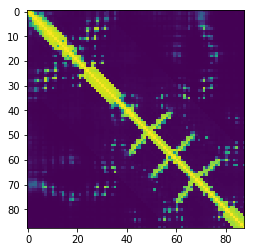

In [180]:
# plot the Contact map
plt.imshow(cm)